In [61]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [16, 9]
# dir = 'BH_short_MPS_LINEARRAMP_0.001_2.0_20'
# dir = 'BH_short_MPS_LINEARRAMP_0.001_1.0_20'
# dir = 'BH_short_MPS_LINEARRAMP_0.001_0.5_20'
# dir = 'BH_short_MPS_LINEARRAMP_0.001_0.2_20'
# dir = 'BH_short_MPS_LINEARRAMP_0.001_0.1_20'
# dir = 'BH_short_MPS_LINEARRAMP_0.001_0.05_20'
# dir = 'BH_short_MPS_LINEARRAMP_0.001_0.02_20'
# dir = 'BH_short_MPS_LINEARRAMP_0.001_0.01_20'

# dir = 'BH_short_PEPS_LINEARRAMP_0.001_2.0_20'
# dir = 'BH_short_PEPS_LINEARRAMP_0.001_1.0_20'
# dir = 'BH_short_PEPS_LINEARRAMP_0.001_0.5_20'
# dir = 'BH_short_PEPS_LINEARRAMP_0.001_0.2_20'
dir = 'BH_short_PEPS_LINEARRAMP_0.001_0.1_20'
# dir = 'BH_short_PEPS_LINEARRAMP_0.001_0.05_20'
# dir = 'BH_short_PEPS_LINEARRAMP_0.001_0.02_20'
# dir = 'BH_short_PEPS_LINEARRAMP_0.001_0.01_20'

# dir = 'BH_short_MPS_CUBICRAMP_0.001_2.0_20'
# dir = 'BH_short_MPS_CUBICRAMP_0.001_1.0_20'
# dir = 'BH_short_MPS_CUBICRAMP_0.001_0.5_20'
# dir = 'BH_short_MPS_CUBICRAMP_0.001_0.2_20'
# dir = 'BH_short_MPS_CUBICRAMP_0.001_0.1_20'
# dir = 'BH_short_MPS_CUBICRAMP_0.001_0.05_20'
# dir = 'BH_short_MPS_CUBICRAMP_0.001_0.02_20'
# dir = 'BH_short_MPS_CUBICRAMP_0.001_0.01_20'

# dir = 'BH_short_PEPS_CUBICRAMP_0.001_2.0_20'
# dir = 'BH_short_PEPS_CUBICRAMP_0.001_1.0_20'
# dir = 'BH_short_PEPS_CUBICRAMP_0.001_0.5_20'
# dir = 'BH_short_PEPS_CUBICRAMP_0.001_0.2_20'
# dir = 'BH_short_PEPS_CUBICRAMP_0.001_0.1_20'
# dir = 'BH_short_PEPS_CUBICRAMP_0.001_0.05_20'
# dir = 'BH_short_PEPS_CUBICRAMP_0.001_0.02_20'
# dir = 'BH_short_PEPS_CUBICRAMP_0.001_0.01_20'

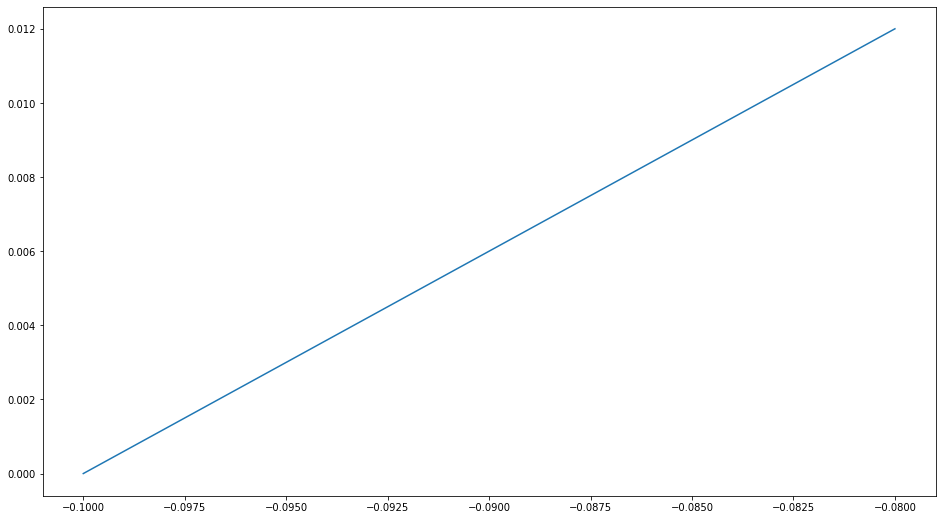

In [62]:
SPECS = dict(np.load(dir + "/SPECS.npz"))
for key in list(SPECS):
    SPECS[key] = SPECS[key].min()
# SPECS['n'] = 46
def pow(x,A,alpha):
    return A*(x/SPECS['tQ']+1)**alpha
def p0(ts,ys):
    try:
        x1=ts[-9]/SPECS['tQ']+1
        x2=ts[-10]/SPECS['tQ']+1
        y1=ys[-9]
        y2=ys[-10]
        alpha = np.log(y1/y2)/np.log(x1/x2)
        A = y1/(x1**alpha)
        return [A,alpha]
    except:
        return [0.001,4]
ts = []
CTMerror = []
Js = []
CTMs = []
for i in range(SPECS['n']+1):
    try:
        ENV = np.load(dir + ('/RHOA_{:05d}.npz'.format(i)))
        CTMs.append(i)
        PEPS = np.load(dir + ('/PEPS_{:05d}.npz'.format(i)))
        Js.append(PEPS['J'])
        if 'tQ' in list(SPECS):
            ts.append(PEPS['iter'] * PEPS['dt'] - PEPS['tQ'])
        else:
            ts.append(PEPS['iter'] * PEPS['dt'])

        CTMerror.append(ENV['error'])
    except:
        pass

plt.clf()
plt.plot(ts, Js)
plt.show()

In [63]:
dict(PEPS)

{'A': array([[[[[ 9.49847138e-12+6.06378972e-12j,
             9.98602360e-01+2.15921319e-08j,
             5.45541491e-11-8.82054134e-12j],
           [ 1.80589103e-02-4.92260168e-03j,
            -6.15381666e-14+2.51314835e-13j,
            -1.22443470e-03-1.25191238e-03j],
           [-5.85965114e-04+1.64991394e-03j,
             9.90149262e-13-7.75155218e-14j,
            -1.84547551e-02+3.10954817e-03j],
           ...,
           [-1.80923967e-09+1.55389852e-10j,
            -2.42061879e-10+1.53125225e-10j,
            -2.00866426e-09-1.32489537e-09j],
           [ 4.47942242e-09+9.19505165e-09j,
            -4.36370639e-10-2.51004424e-10j,
            -1.28708223e-09+3.83244560e-09j],
           [-1.18237383e-08+9.89280788e-09j,
            -5.31416243e-10+4.79642743e-10j,
            -5.46456969e-09-9.50587101e-10j]],
 
          [[-1.24964327e-02+1.06826786e-02j,
             5.37499203e-13+4.12716149e-13j,
            -8.53963612e-03-3.21303288e-03j],
           [ 5.86858107e

Wykładnik = 4.135940740844164 ± 0.05452789171426398
Współczynnik = 0.0011240689360030864 ± 0.00019898397758413432


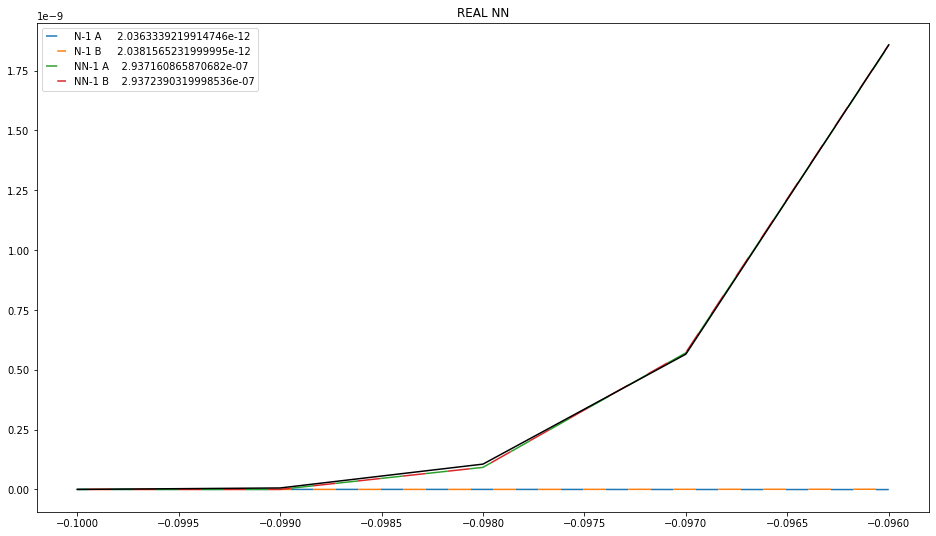

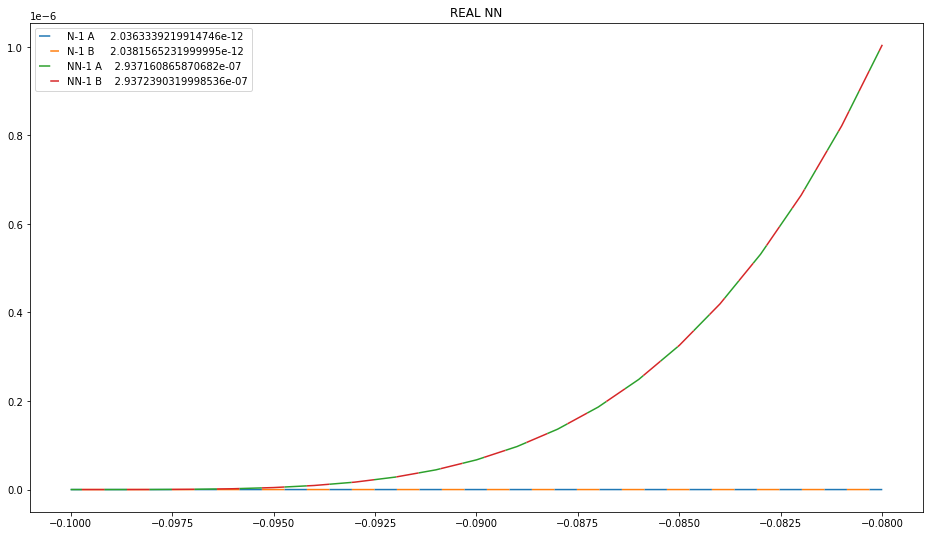

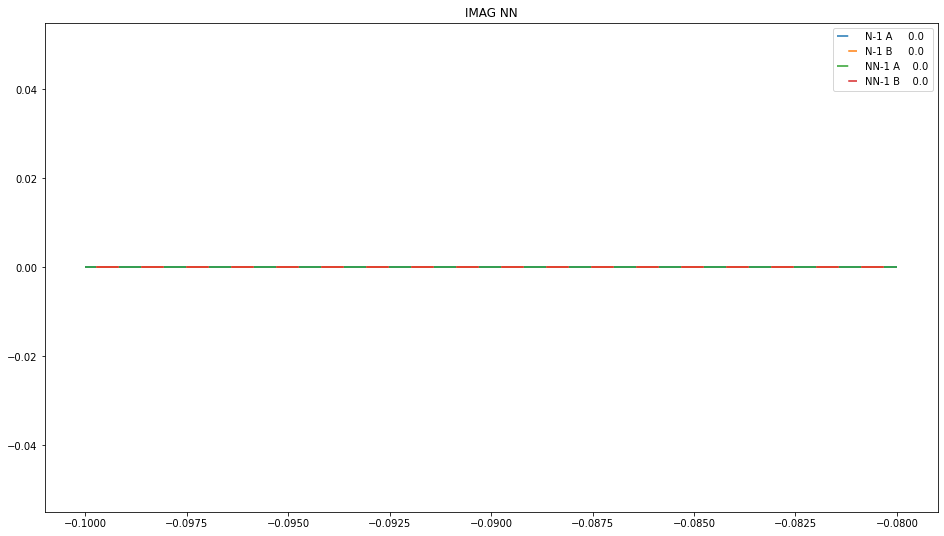

In [64]:
nA, nB, nnA, nnB = [], [], [], []
for i in CTMs:
    ENV = np.load(dir + ('/RHOA_{:05d}.npz'.format(i)))
    rhoA = ENV['rhoA']/np.trace(ENV['rhoA'])
    rhoB = ENV['rhoB']/np.trace(ENV['rhoB'])
    nA.append(np.trace(rhoA @ np.diag([0, 1, 2])) - 1)
    nB.append(np.trace(rhoB @ np.diag([0, 1, 2])) - 1)
    nnA.append(np.trace(rhoA @ np.diag([0, 1, 4])) - 1)
    nnB.append(np.trace(rhoB @ np.diag([0, 1, 4])) - 1)

nA = np.array(nA)
nB = np.array(nB)
nnA = np.array(nnA)
nnB = np.array(nnB)

maxind = 5
ys = (nnA/2+nnB/2).real
popt, pcov = curve_fit(pow,ts[:maxind],ys[:maxind],p0(ts,ys))
pstd = np.sqrt(np.diag(pcov))
NNwyk=popt[1]
NNwsp=popt[0]
print("Wykładnik =",popt[1],"±",pstd[1])
print("Współczynnik =",popt[0],"±",pstd[0])

lim=maxind
plt.clf()
plt.title("REAL NN")
plt.plot(ts[:lim], nA.real[:lim], label='N-1 A     ' + str(np.std(nA.real)), linestyle=(7.5, (15, 15)))
plt.plot(ts[:lim], nB.real[:lim], label='N-1 B     ' + str(np.std(nB.real)), linestyle=(-7.5, (15, 15)))
plt.plot(ts[:lim], nnA.real[:lim], label='NN-1 A    ' + str(np.std(nnA.real)), linestyle=(7.5, (15, 15)))
plt.plot(ts[:lim], nnB.real[:lim], label='NN-1 B    ' + str(np.std(nnB.real)), linestyle=(-7.5, (15, 15)))
plt.plot(ts[:lim],pow(ts[:lim],*popt),color='k')
plt.legend()
plt.show()

plt.clf()
plt.title("REAL NN")
plt.plot(ts, nA.real, label='N-1 A     ' + str(np.std(nA.real)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nB.real, label='N-1 B     ' + str(np.std(nB.real)), linestyle=(-7.5, (15, 15)))
plt.plot(ts, nnA.real, label='NN-1 A    ' + str(np.std(nnA.real)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nnB.real, label='NN-1 B    ' + str(np.std(nnB.real)), linestyle=(-7.5, (15, 15)))
plt.legend()
plt.show()

plt.clf()
plt.title("IMAG NN")
plt.plot(ts, nA.imag, label='N-1 A     ' + str(np.std(nA.imag)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nB.imag, label='N-1 B     ' + str(np.std(nB.imag)), linestyle=(-7.5, (15, 15)))
plt.plot(ts, nnA.imag, label='NN-1 A    ' + str(np.std(nnA.imag)), linestyle=(7.5, (15, 15)))
plt.plot(ts, nnB.imag, label='NN-1 B    ' + str(np.std(nnB.imag)), linestyle=(-7.5, (15, 15)))
plt.legend()
plt.show()

Wykładnik = 3.2115290941384003 ± 0.09329082034388293
Współczynnik = 0.012532515899749913 ± 0.003819668647548408


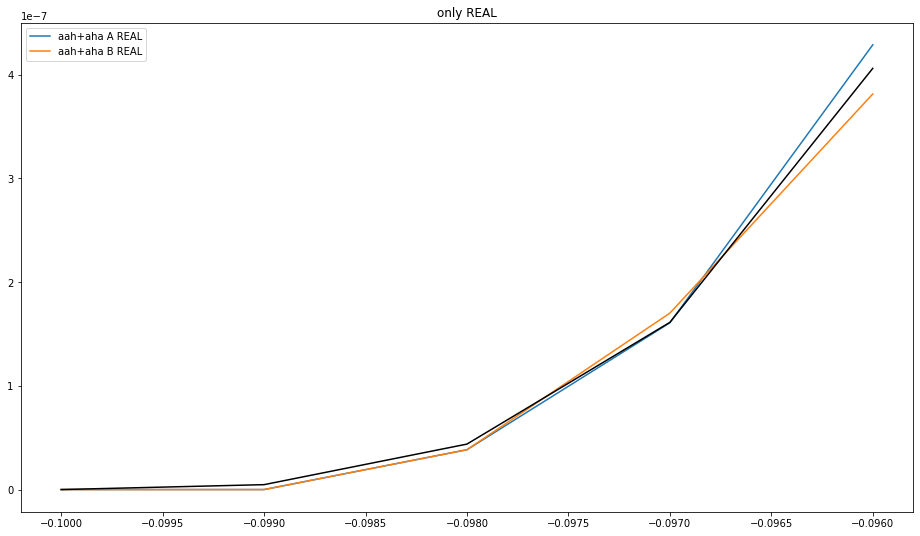

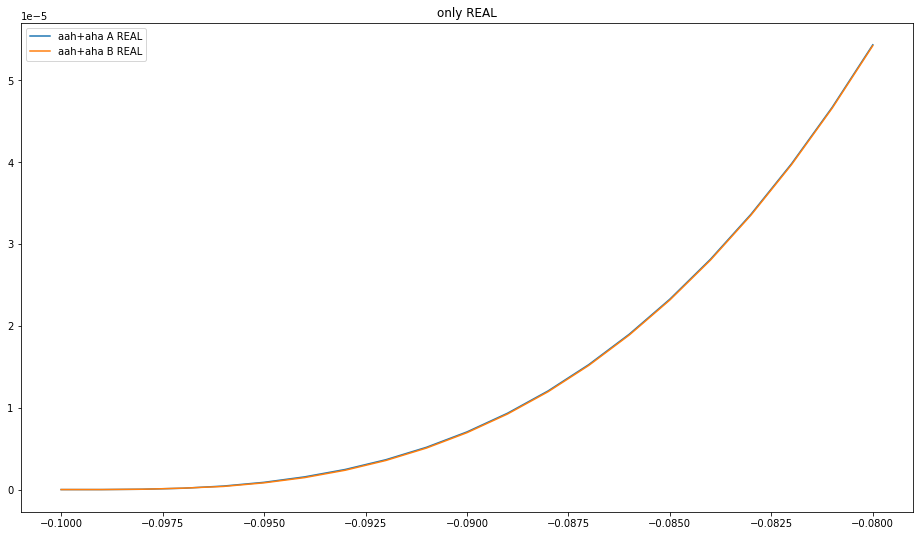

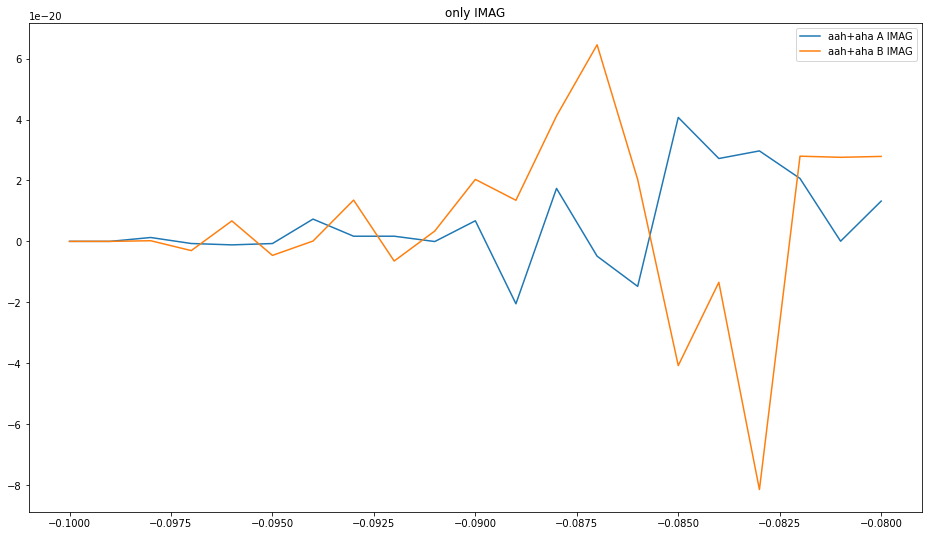

In [65]:
arA, arB = [], []
dist = 1

E_AB_aah = []
E_BA_aah = []
E_AB_aha = []
E_BA_aha = []

for i in CTMs:
    try:
        corrAAH = dict(np.load(dir + "/CORR_AAH_WE_{:05d}.npz".format(i)))
        corrAHA = dict(np.load(dir + "/CORR_AHA_WE_{:05d}.npz".format(i)))

        E_AB_aha.append(corrAHA['corA'][dist])
        E_AB_aah.append(corrAAH['corA'][dist])
        E_BA_aha.append(corrAHA['corB'][dist])
        E_BA_aah.append(corrAAH['corB'][dist])
    except:
        print(i)
        break

E_AB_aha = np.array(E_AB_aha)
E_AB_aah = np.array(E_AB_aah)
E_BA_aha = np.array(E_BA_aha)
E_BA_aah = np.array(E_BA_aah)

maxind = 5
ys = (E_AB_aha/4+E_AB_aah/4+E_BA_aha/4+E_BA_aah/4).real
popt, pcov = curve_fit(pow,ts[:maxind],ys[:maxind],p0(ts,ys))
pstd = np.sqrt(np.diag(pcov))
AAwyk=popt[1]
AAwsp=popt[0]
print("Wykładnik =",popt[1],"±",pstd[1])
print("Współczynnik =",popt[0],"±",pstd[0])

lim=maxind
plt.clf()
plt.title("only REAL")
plt.plot(ts[:lim], (E_AB_aha.real / 2 + E_AB_aah.real / 2)[:lim], label='aah+aha A REAL')
plt.plot(ts[:lim], (E_BA_aha.real / 2 + E_BA_aah.real / 2)[:lim], label='aah+aha B REAL')
plt.plot(ts[:lim],pow(ts[:lim],*popt),color='k')
plt.legend()
plt.show()

plt.clf()
plt.title("only REAL")
plt.plot(ts, E_AB_aha.real / 2 + E_AB_aah.real / 2, label='aah+aha A REAL')
plt.plot(ts, E_BA_aha.real / 2 + E_BA_aah.real / 2, label='aah+aha B REAL')
plt.legend()
plt.show()

plt.clf()
plt.title("only IMAG")
plt.plot(ts, E_AB_aha.imag / 2 + E_AB_aah.imag / 2, label='aah+aha A IMAG')
plt.plot(ts, E_BA_aha.imag / 2 + E_BA_aah.imag / 2, label='aah+aha B IMAG')
plt.legend()
plt.show()

Wykładnik = 4.144260069412902 ± 0.05229389503694631
Współczynnik = -0.0011539693947505585 ± 0.0001958988144290064


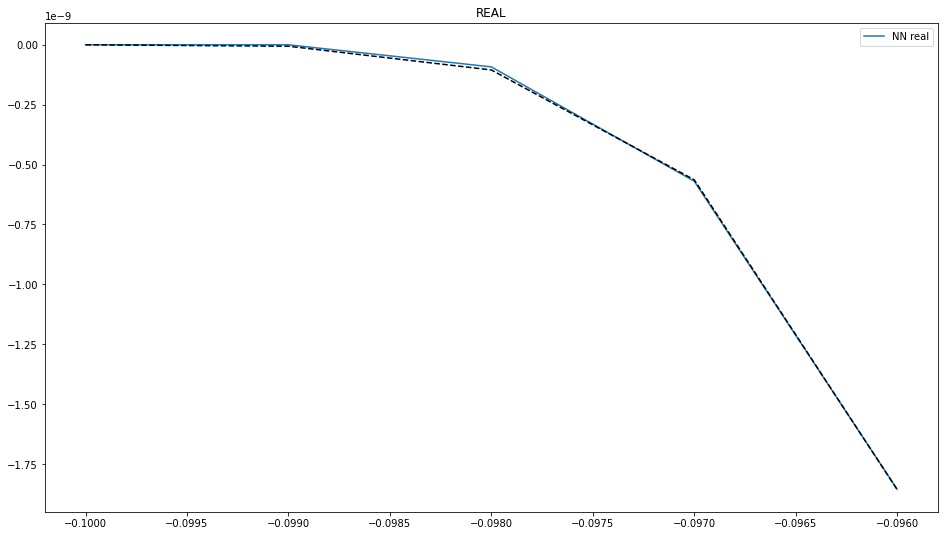

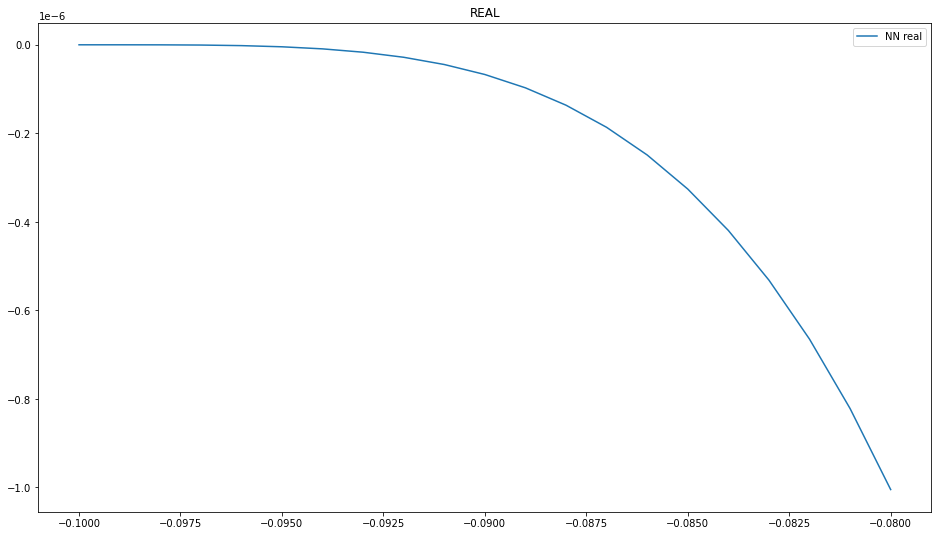

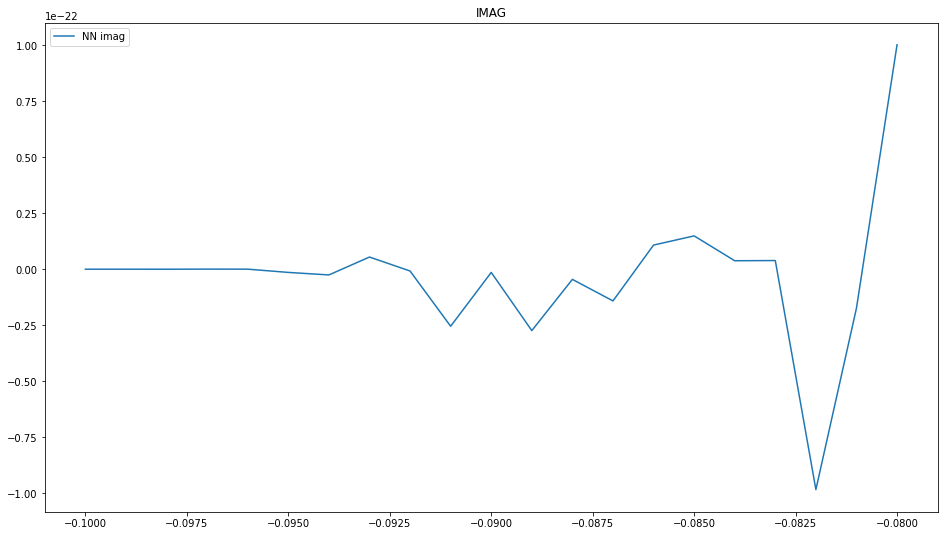

In [66]:
arA, arB = [], []
dist = 1

E_AB_WE_NN, E_BA_WE_NN, E_AB_NS_NN, E_BA_NS_NN = [], [], [], []

for i in range(SPECS['n']+1):
    try:
        corrNN_WE = dict(np.load(dir + "/CORR_NN_WE_{:05d}.npz".format(i)))
        corrNN_NS = dict(np.load(dir + "/CORR_NN_NS_{:05d}.npz".format(i)))

        E_AB_WE_NN.append(corrNN_WE['corA'][dist])
        E_BA_WE_NN.append(corrNN_WE['corB'][dist])
        E_AB_NS_NN.append(corrNN_NS['corA'][dist])
        E_BA_NS_NN.append(corrNN_NS['corB'][dist])
    except:
        print(i)
        break

E_AB_WE_NN = np.array(E_AB_WE_NN) - E_AB_WE_NN[0]
E_BA_WE_NN = np.array(E_BA_WE_NN) - E_BA_WE_NN[0]
E_AB_NS_NN = np.array(E_AB_NS_NN) - E_AB_NS_NN[0]
E_BA_NS_NN = np.array(E_BA_NS_NN) - E_BA_NS_NN[0]
average = E_AB_WE_NN+E_BA_WE_NN+E_AB_NS_NN+E_BA_NS_NN

maxind = 5
lim=maxind
ys = average.real
popt, pcov = curve_fit(pow,ts[:maxind],ys[:maxind],p0(ts,ys))
pstd = np.sqrt(np.diag(pcov))
AAwyk=popt[1]
AAwsp=popt[0]
print("Wykładnik =",popt[1],"±",pstd[1])
print("Współczynnik =",popt[0],"±",pstd[0])

plt.clf()
plt.title("REAL")
plt.plot(ts[:lim], average.real[:lim], label='NN real')
plt.plot(ts[:lim],pow(ts[:lim],*popt),color='k',linestyle='dashed')
plt.legend()
plt.show()

plt.clf()
plt.title("REAL")
plt.plot(ts, average.real, label='NN real')
plt.legend()
plt.show()

plt.clf()
plt.title("IMAG")
plt.plot(ts, average.imag, label='NN imag')
plt.legend()
plt.show()